In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 155.2105577411411
Iteration 2, RMSE: 141.88895183236582
Iteration 3, RMSE: 159.0485951230725
Iteration 4, RMSE: 150.2378109269186
Iteration 5, RMSE: 131.48171997833794
Iteration 6, RMSE: 129.2995982310762
Iteration 7, RMSE: 119.56168331391022
Iteration 8, RMSE: 151.78776205728573
Iteration 9, RMSE: 143.6225338798415
Iteration 10, RMSE: 137.5154392299067
Iteration 11, RMSE: 144.63255983124293
Iteration 12, RMSE: 130.65148203539297
Iteration 13, RMSE: 136.655019285156
Iteration 14, RMSE: 134.76342019298855
Iteration 15, RMSE: 132.96203108819392
Iteration 16, RMSE: 126.8283804464844
Iteration 17, RMSE: 137.3872621721465
Iteration 18, RMSE: 143.45023357355035
Iteration 19, RMSE: 144.54864219483534
Iteration 20, RMSE: 143.00975890954635
Iteration 21, RMSE: 146.24454015410396
Iteration 22, RMSE: 149.05669516550853
Iteration 23, RMSE: 132.10043095257132
Iteration 24, RMSE: 137.73939457937735
Iteration 25, RMSE: 124.59438546238731
Iteration 26, RMSE: 121.09673007969616
Itera

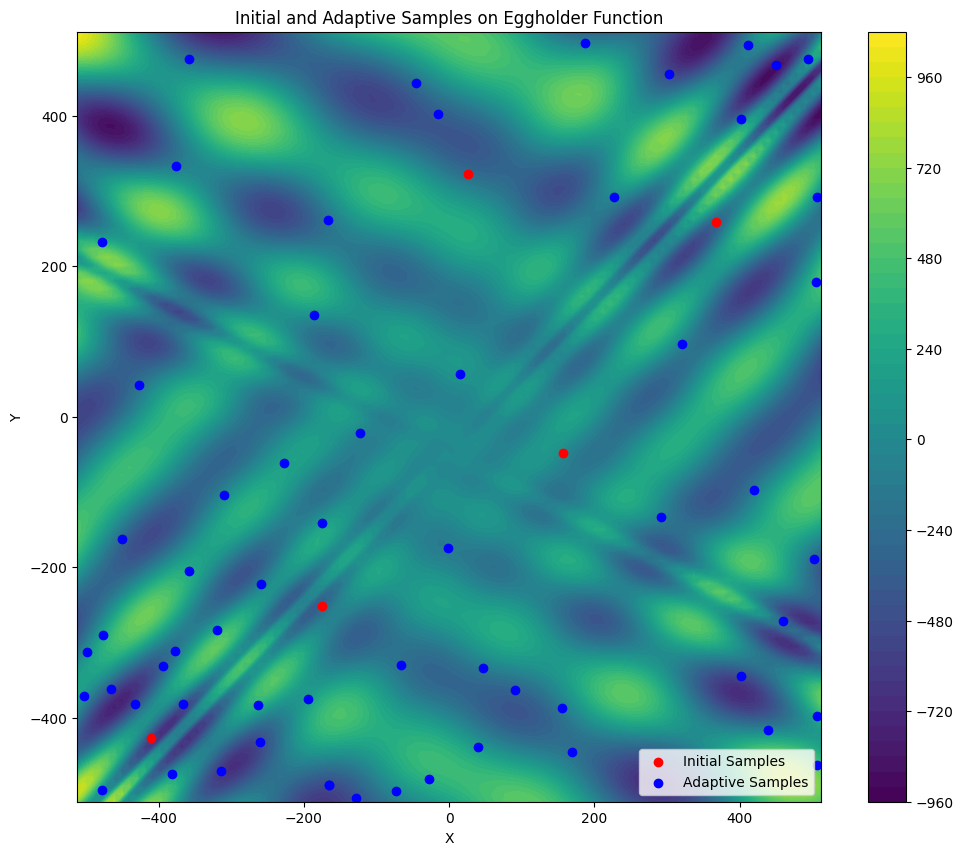

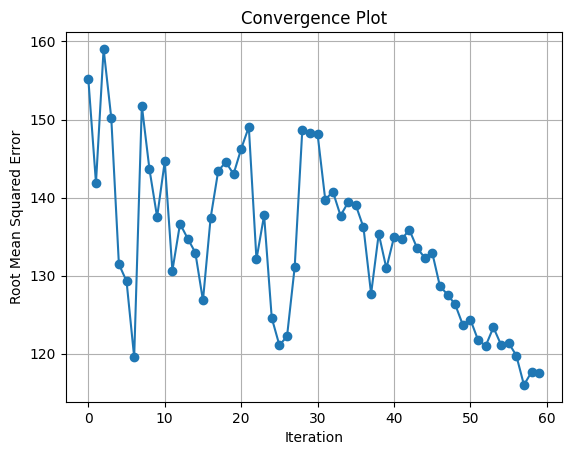

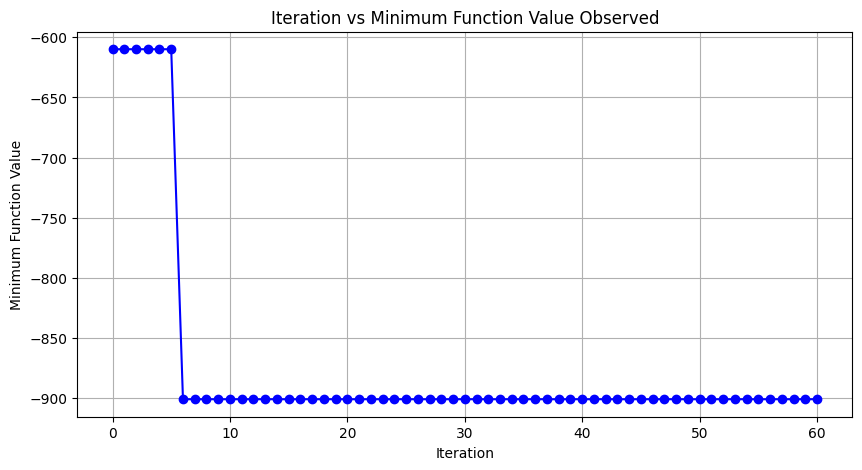

Best observed function value after active learning: -900.8478636959142
             X           Y
0   367.391128  259.196323
1    25.449484  322.350311
2  -174.956672 -251.725737
3   156.591441  -48.800937
4  -410.069370 -427.355696
..         ...         ...
61  291.615240 -132.773728
62 -259.553528 -221.854777
63 -502.099525 -371.220414
64 -165.320970 -489.174146
65 -165.320970 -489.174146

[66 rows x 2 columns]


In [2]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh([(-512, 512), (-512, 512)], num_points=100, function=ex_func.eggholder)

# Generate initial samples
lhs_sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = lhs_sampler.sample(num_samples=5, ranges = [(-512, 512), (-512, 512)] )
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, lhs_sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(5, [(-512, 512), (-512, 512)])

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder")